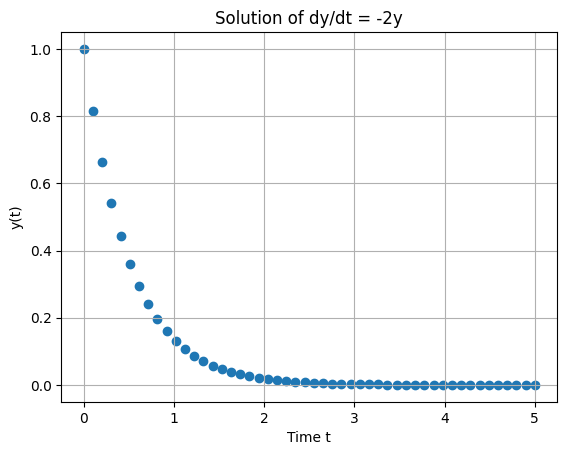

In [14]:
import numpy as np
from scipy.integrate import solve_ivp #  solve initial value problems for ODEs.
import matplotlib.pyplot as plt

# Example: dy/dt = -2y, y(0) = 1
def dydt(t, y):
    return -2 * y

sol = solve_ivp(fun=dydt, t_span=[0, 5], y0=[1], t_eval=np.linspace(0, 5, 50))
x_data = sol.t
y_data = sol.y[0]

# plt.plot(sol.t, sol.y[0]) # OR use this
plt.scatter(x_data,y_data )

plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y')
plt.grid(True)
plt.show()


# APPLICATION1
First-order ODE (exponential decay)

A simple first-order ODE:

$ \frac{dy}{dt} = -ky,; y(0) = y_0 $

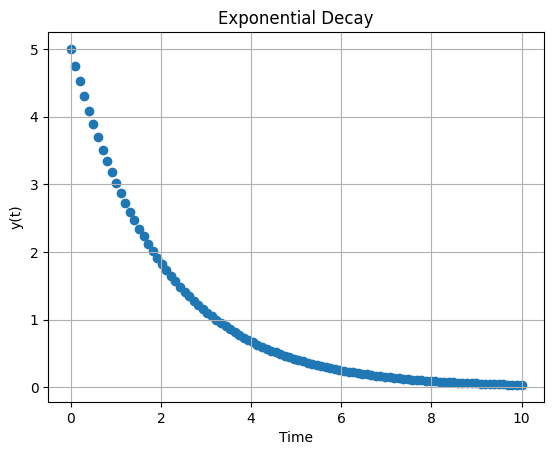

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# dy/dt = -k*y
k = 0.5

def decay(t, y):
    return -k * y

sol = solve_ivp(fun=decay, t_span=[0, 10], y0=[5], t_eval=np.linspace(0, 10, 100))
x_data = sol.t
y_data = sol.y[0]

# plt.plot(sol.t, sol.y[0]) # OR use this
plt.scatter(x_data,y_data )

plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Exponential Decay')
plt.grid(True)
plt.show()


# APPLICATION2
Mass-Spring-Damper (Second-order ODE)

$ m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0 $

Rewritten as a first-order system:

$
\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{c}{m}v - \frac{k}{m}x
\end{cases}
$

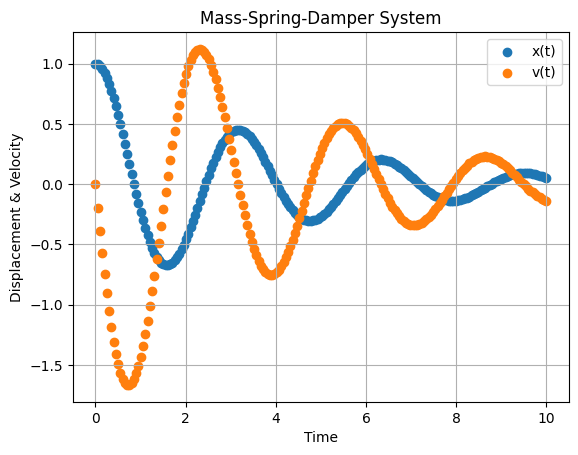

In [ ]:
m = 1.0  # kg
c = 0.5  # Ns/m
k = 4.0  # N/m

def mass_spring_damper(t, y):
    x, v = y # y is just a variable that holds x,v values when this function is called
    dxdt = v
    dvdt = -(c/m)*v - (k/m)*x
    return [dxdt, dvdt]

sol = solve_ivp(fun=mass_spring_damper, t_span=[0, 10], y0=[1.0, 0.0], t_eval=np.linspace(0, 10, 200))

# plt.plot(sol.t, sol.y[0], label='x(t)')
# plt.plot(sol.t, sol.y[1], label='v(t)')

plt.scatter(sol.t, sol.y[0], label='x(t)')
plt.scatter(sol.t, sol.y[1], label='v(t)')


plt.xlabel('Time')
plt.ylabel('Displacement & Velocity')
plt.title('Mass-Spring-Damper System')
plt.legend()
plt.grid(True)
plt.show()


# APPLICATION3
Lotka–Volterra Predator–Prey System

$
\begin{cases}
\frac{dx}{dt} = \alpha x - \beta xy \\
\frac{dy}{dt} = \delta xy - \gamma y
\end{cases}
$

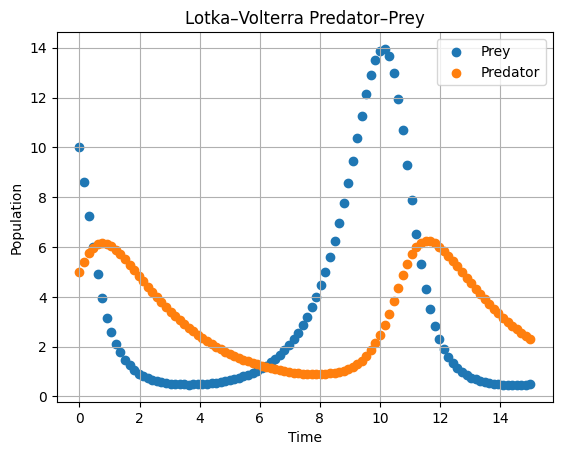

In [ ]:
# Parameters
alpha = 1.1  # prey birth rate
beta = 0.4   # predation rate
delta = 0.1  # predator reproduction
gamma = 0.4  # predator death rate

def lotka_volterra(t, z):
    x, y = z # z is just a variable that holds x,y values when this function is called
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

sol = solve_ivp(fun=lotka_volterra, t_span=[0, 15], y0=[10, 5], t_eval=np.linspace(0, 15, 100))

# plt.plot(sol.t, sol.y[0], label='Prey')
# plt.plot(sol.t, sol.y[1], label='Predator')
plt.scatter(sol.t, sol.y[0], label='Prey')
plt.scatter(sol.t, sol.y[1], label='Predator')



plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka–Volterra Predator–Prey')
plt.legend()
plt.grid(True)
plt.show()


# APPLICATION4
Stiff ODE (Robertson’s Problem — chemical kinetics)

A classic stiff ODE example 

$
\begin{cases}
\frac{dy_0}{dt} = -0.04 y_0 + 10^4 y_1 y_2 \\
\frac{dy_1}{dt} = 0.04 y_0 - 10^4 y_1, y_2 - 3 \times 10^7 y_1^2 \\
\frac{dy_2}{dt} = 3 \times 10^7 y_1^2
\end{cases}
$

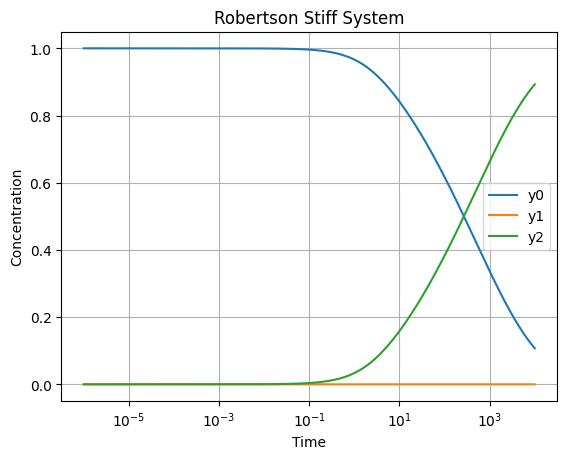

In [21]:
def robertson(t, y):
    dy0 = -0.04*y[0] + 1e4*y[1]*y[2]
    dy1 = 0.04*y[0] - 1e4*y[1]*y[2] - 3e7*y[1]**2
    dy2 = 3e7*y[1]**2
    return [dy0, dy1, dy2]

y0 = [1, 0, 0]
t_span = (0, 1e4)
t_eval = np.logspace(-6, 4, 400)

sol = solve_ivp(fun=robertson, t_span=t_span, y0=y0, method='Radau', t_eval=t_eval)

plt.semilogx(sol.t, sol.y[0], label='y0')
plt.semilogx(sol.t, sol.y[1], label='y1')
plt.semilogx(sol.t, sol.y[2], label='y2')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Robertson Stiff System')
plt.legend()
plt.grid(True)
plt.show()
